In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
sys.path.append('/users/mtaranov/LongRange3D/')
from models_binnedFeat import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 2500 MB, cuDNN 5105)


In [2]:
contacts='PE'
path='/users/mtaranov/datasets_3d/dist_matched_'+contacts+'/'
X_train = get_features(path+'X_train_thres_10.npy')
y_train = get_labels(path+'y_train_thres_10.npy')
X_valid = get_features(path+'X_valid_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')
X_test = get_features(path+'X_test_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')

In [3]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [5]:
scores_from_10_iter =[]
for i in range(10):
    dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)
    validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)
    dnn_normalized.save(contacts+'dnn_CONV_wo_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :10, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/'+contacts+'dnn_CONV_wo_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/'+contacts+'dnn_CONV_wo_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :10, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

# pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
# #np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
# pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
# #np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
# pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
# #np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Training model...
Train on 4824 samples, validate on 2872 samples
Epoch 1/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.3510Epoch 0: validation loss: 0.623
Balanced Accuracy: 66.71%	 auROC: 0.723	 auPRC: 0.692	 auPRG: 0.468
Recall at 5%|10%|20% FDR: 0.6%|0.6%|0.6%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 1.3591 - val_loss: 0.6230
Epoch 2/100
4500/4824 [==========================>...] - ETA: 0s - loss: 0.9518Epoch 1: validation loss: 0.583
Balanced Accuracy: 69.50%	 auROC: 0.766	 auPRC: 0.740	 auPRG: 0.544
Recall at 5%|10%|20% FDR: 0.3%|0.3%|40.2%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 0.9566 - val_loss: 0.5833
Epoch 3/100
4500/4824 [==========================>...] - ETA: 0s - loss: 0.7878Epoch 2: validation loss: 0.571
Balanced Accuracy: 72.28%	 auROC: 0.784	 auPRC: 0.758	 auPRG: 0.593
Recall at 5%|10%|20% FDR: 0.3%|0.3%|45.5%	 Num Positives: 

INFO (theano.gof.compilelock): Waiting for existing lock by process '24347' (I am process '24053')
INFO (theano.gof.compilelock): To manually release the lock, delete /users/mtaranov/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '24347' (I am process '24053')
INFO (theano.gof.compilelock): To manually release the lock, delete /users/mtaranov/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir


Training model...
Train on 4824 samples, validate on 2872 samples
Epoch 1/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.3816Epoch 0: validation loss: 0.628
Balanced Accuracy: 64.38%	 auROC: 0.747	 auPRC: 0.738	 auPRG: 0.499
Recall at 5%|10%|20% FDR: 0.1%|8.8%|34.1%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 1.3739 - val_loss: 0.6280
Epoch 2/100
4500/4824 [==========================>...] - ETA: 0s - loss: 0.9384Epoch 1: validation loss: 0.582
Balanced Accuracy: 69.67%	 auROC: 0.776	 auPRC: 0.751	 auPRG: 0.567
Recall at 5%|10%|20% FDR: 0.3%|0.3%|40.9%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 0.9432 - val_loss: 0.5823
Epoch 3/100
4500/4824 [==========================>...] - ETA: 0s - loss: 0.7811Epoch 2: validation loss: 0.558
Balanced Accuracy: 72.81%	 auROC: 0.800	 auPRC: 0.785	 auPRG: 0.622
Recall at 5%|10%|20% FDR: 0.9%|11.4%|53.8%	 Num Positives

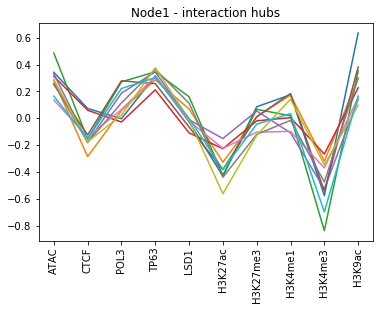

In [6]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - interaction hubs')

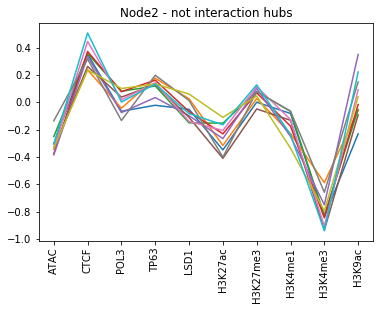

In [7]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - not interaction hubs')

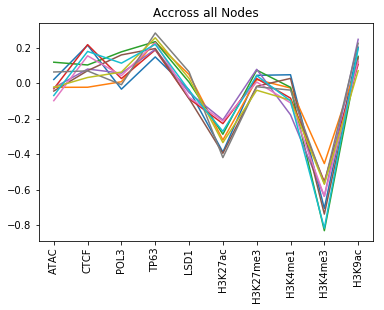

In [8]:
for i in range(10):
    # mean feature importance accross nodes
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

In [9]:
i=0
vmin = np.min(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
vmax = np.max(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
x = [float(i+0.5) for i in range(np.shape(scores)[2])]

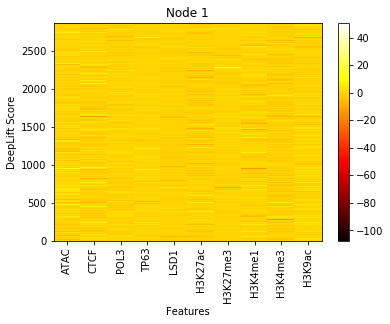

In [10]:
#plt.imshow(scores[:, 0, :, 0], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 0], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

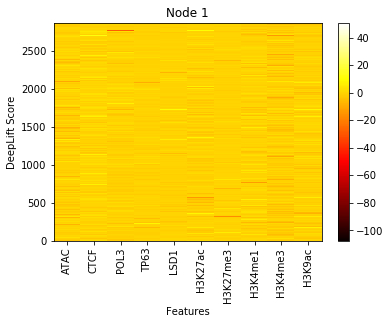

In [ ]:
#plt.imshow(scores[:, 0, :, 1], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 1], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

# with genomic locations

In [4]:
scores_from_10_iter =[]
for i in range(10):
    dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)
    validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)
    dnn_normalized.save(contacts+'dnn_CONV_w_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :11, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :11, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/'+contacts+'dnn_CONV_w_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/'+contacts+'dnn_CONV_w_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :11, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Training model...
Train on 4824 samples, validate on 2872 samples
Epoch 1/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.4511Epoch 0: validation loss: 0.605
Balanced Accuracy: 68.91%	 auROC: 0.752	 auPRC: 0.723	 auPRG: 0.519
Recall at 5%|10%|20% FDR: 0.1%|0.1%|32.7%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 1.4350 - val_loss: 0.6051
Epoch 2/100
4500/4824 [==========================>...] - ETA: 0s - loss: 0.9497Epoch 1: validation loss: 0.566
Balanced Accuracy: 71.27%	 auROC: 0.786	 auPRC: 0.765	 auPRG: 0.581
Recall at 5%|10%|20% FDR: 0.3%|4.0%|43.6%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 0.9483 - val_loss: 0.5663
Epoch 3/100
4500/4824 [==========================>...] - ETA: 0s - loss: 0.7498Epoch 2: validation loss: 0.553
Balanced Accuracy: 73.40%	 auROC: 0.799	 auPRC: 0.778	 auPRG: 0.618
Recall at 5%|10%|20% FDR: 0.1%|3.8%|50.2%	 Num Positives:

INFO (theano.gof.compilelock): Waiting for existing lock by process '24347' (I am process '34091')
INFO (theano.gof.compilelock): To manually release the lock, delete /users/mtaranov/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '24347' (I am process '34091')
INFO (theano.gof.compilelock): To manually release the lock, delete /users/mtaranov/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir


Training model...
Train on 4824 samples, validate on 2872 samples
Epoch 1/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.4403Epoch 0: validation loss: 0.611
Balanced Accuracy: 67.51%	 auROC: 0.738	 auPRC: 0.724	 auPRG: 0.493
Recall at 5%|10%|20% FDR: 0.5%|0.8%|29.7%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 1.4385 - val_loss: 0.6112
Epoch 2/100
4500/4824 [==========================>...] - ETA: 0s - loss: 0.9451Epoch 1: validation loss: 0.572
Balanced Accuracy: 71.17%	 auROC: 0.776	 auPRC: 0.768	 auPRG: 0.568
Recall at 5%|10%|20% FDR: 1.8%|14.7%|42.8%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 12s - loss: 0.9419 - val_loss: 0.5720
Epoch 3/100
4500/4824 [==========================>...] - ETA: 0s - loss: 0.7715Epoch 2: validation loss: 0.553
Balanced Accuracy: 72.84%	 auROC: 0.797	 auPRC: 0.789	 auPRG: 0.610
Recall at 5%|10%|20% FDR: 11.5%|19.6%|49.0%	 Num Positiv

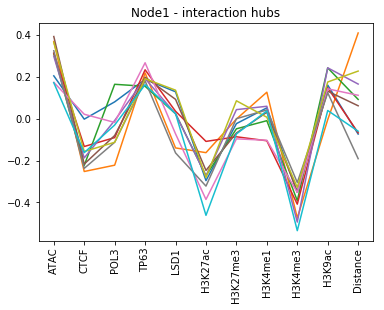

In [5]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'Distance']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - interaction hubs')

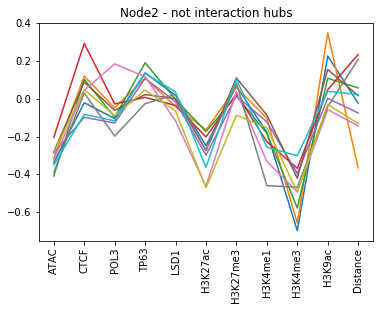

In [6]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - not interaction hubs')

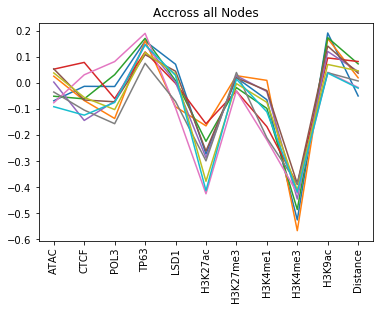

In [7]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

# with distance only

In [14]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 4824 samples, validate on 2872 samples
Epoch 1/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.5329Epoch 0: validation loss: 0.718
Balanced Accuracy: 52.44%	 auROC: 0.513	 auPRC: 0.511	 auPRG: 0.000
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 1.5272 - val_loss: 0.7180
Epoch 2/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.4286Epoch 1: validation loss: 0.736
Balanced Accuracy: 48.61%	 auROC: 0.498	 auPRC: 0.490	 auPRG: 0.000
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 1.4267 - val_loss: 0.7365
Epoch 3/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.4051Epoch 2: validation loss: 0.741
Balanced Accuracy: 49.41%	 auROC: 0.498	 auPRC: 0.493	 auPRG: -0.004
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1

In [ ]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))
print(dnn_normalized.test(X_train_normalized[:, :,  10:, :], y_train))

Balanced Accuracy: 48.79%	 auROC: 0.480	 auPRC: 0.494	 auPRG: -0.043
Recall at 5%|10%|20% FDR: 0.2%|0.2%|0.2%	 Num Positives: 906	 Num Negatives: 906	 
Balanced Accuracy: 49.77%	 auROC: 0.502	 auPRC: 0.509	 auPRG: -0.011
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 2412	 Num Negatives: 2412	 


## with ATAC only

In [ ]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)
validation_data = (X_valid_normalized[:, :, :1, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :1, :], y_train, validation_data)

Training model...
Train on 4824 samples, validate on 2872 samples
Epoch 1/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.4312Epoch 0: validation loss: 0.710
Balanced Accuracy: 50.49%	 auROC: 0.499	 auPRC: 0.515	 auPRG: -0.031
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 1.4239 - val_loss: 0.7098
Epoch 2/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.3718Epoch 1: validation loss: 0.709
Balanced Accuracy: 50.66%	 auROC: 0.516	 auPRC: 0.524	 auPRG: 0.008
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 10s - loss: 1.3725 - val_loss: 0.7088
Epoch 3/100
4500/4824 [==========================>...] - ETA: 0s - loss: 1.3454

In [ ]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))
print(dnn_normalized.test(X_train_normalized[:, :,  10:, :], y_train))

# Print prediction

In [12]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [13]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

NameError: name 'pred_probs_train' is not defined

In [ ]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

In [ ]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

In [ ]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )